# Data Visualization
### ***Objective***
### **Google Play Store team is about to launch a new feature where in certain apps that are**
### **promising are boosted in visibility. The boost will manifest in multiple ways – higher priority in**
### **recommendations sections (“Similar apps”, “You might also like”, “New and updated games”).**
### **These will also get a boost in visibility in search results. This feature will help bring more**
### **attention to newer apps that have potential.**
### **The task is to understand what makes an app perform well - size? price? category? multiple**
### **factors together? Analyze the data and present your insights in a format consumable by**
### **business – the final output of the analysis would be presented to business as insights with**
### **supporting data/visualizations.**


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tasks
## 1. Data clean up – Missing value treatment

In [39]:
df= pd.read_csv(r"C:\Users\Lenovo\Desktop\data sci\Python\Assignment 1\Tasks\playstore-analysis.csv")

In [40]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.00000,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.00000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.00000,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.00000,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.00000,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.00000,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.00000,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.00000,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.52952,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [58]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [42]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.00000,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.00000,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.00000,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.52952,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.00000,"10,000,000+",Free,0,Everyone,Lifestyle,25-Jul-18,Varies with device,Varies with device


In [43]:
df.shape

(10841, 13)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [45]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**A. Drop records where rating is missing since rating is our target/study variable**

In [52]:
df.dropna(subset=['Rating'], axis=0, inplace = True)

In [68]:
df.Rating.isnull().sum()

0

In [54]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

# *B. Check the null values for the Android Ver column.*
* i. Are all 3 records having the same problem?

In [13]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.00000,"1,000+",Paid,$1.49,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.00000,"10,000+",Free,0,Everyone,Personalization,27-Mar-18,1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.52952,Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


#### *Yes , All 3 records having the same problem "NaN"*

* ii.Drop the 3rd record i.e. record for “Life Made WIFI …”

In [14]:
df.drop([10472],inplace=True)

In [15]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,27-Mar-18,1.1,NaN


 * iii. Replace remaining missing values with the mode

In [16]:
df['Android Ver'].replace(np.NaN,df['Android Ver'].mode()[0],inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


### C. Current ver – replace with most common value

In [18]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)

In [19]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 2. Data clean up – correcting the data types
* a. Which all variables need to be brought to numeric types?

* b. Price variable – remove $ sign and convert to float

In [36]:
df.drop(df[df['Price']=='Everyone'].index, inplace = True)
df['Price']= price
df['Price']= df['Price'].astype('float')

In [37]:
df.groupby(['Price']).count()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Price,,,,,,,,,,,,
0.00,10040,10040,8719,10040,10040,10040,10039,10040,10040,10040,10034,10039
0.99,148,148,107,148,148,148,148,148,148,148,146,148
1.00,3,3,2,3,3,3,3,3,3,3,3,3
1.04,1,1,0,1,1,1,1,1,1,1,1,1
1.20,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
379.99,1,1,1,1,1,1,1,1,1,1,1,1
389.99,1,1,1,1,1,1,1,1,1,1,1,1
394.99,1,1,0,1,1,1,1,1,1,1,1,1


## C. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [22]:
Install = []
for x in df ['Installs']:
    Install.append(x.replace(',','').replace('+','').strip())
df ['Installs']= Install
df ['Installs']= df ['Installs'].astype('int')

In [23]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


## d. Convert all other identified columns to numeric

In [24]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [25]:
Type2= {'Type':{'Free':0,'paid':1}}
df=df.replace(Type2)

In [26]:
print('type')

type


# 3. Sanity checks – check for the following and handle accordingly
## a. Avg. rating should be between 1 and 5, as only these values are allowed on the play
## store.
**i. Are there any such records? Drop if so.**

In [27]:
df.loc[df.Rating < 1] & df.loc[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


*There are no such records with rating less than 1 or greater than 5.*

## b. Reviews should not be more than installs as only those who installed can review the
## app.
**i. Are there any such records? Drop if so**

In [28]:
df['Reviews']= df['Reviews'].astype('int')

In [29]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.00000,1,0,0.00,Everyone,Medical,2-Aug-18,1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.52952,10000,Paid,2.49,Everyone,Lifestyle,30-Jul-18,Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.00000,1,Paid,1.49,Everyone,Arcade,8-Feb-17,1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.00000,5,0,0.00,Everyone,Arcade,23-Jul-18,1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.00000,10,0,0.00,Everyone,Arcade,11-Mar-17,0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.00000,10,0,0.00,Teen,Social,23-Jul-18,1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.00000,1,Paid,0.99,Everyone,Arcade,3-Mar-17,1,2.3 and up


*Yes, there are 7 records where Review is greater than Installs.*

In [30]:
df.drop(df[df['Reviews']>df['Installs']].index,inplace=True)

In [31]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# Task 4. Identify and handle outliers –
## a. Price column
**i. Make suitable plot to identify outliers in price**

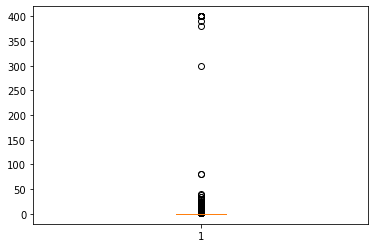

In [32]:
plt.boxplot(df['Price'])
plt.show()

**ii. Do you expect apps on the play store to cost $200? Check out these cases**

In [33]:
df.loc[df['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,16-Jul-18,1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,11-Mar-18,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,3-May-18,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,12-Jan-18,2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,19-May-18,3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,21-Jul-18,1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,12-Nov-17,1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,1-Jul-18,1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,11-Dec-17,1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,1-May-17,3.4,4.4 and up


*Yes we can expect apps on the play store to cost $200*

## iv. Limit data to records with price < $30

In [34]:
df.drop(df[(df['Price']>30)].index,axis=0,inplace=True)

In [35]:
count = df.loc[df['Price'] > 30].index
count.value_counts().sum()

0

**iii. After dropping the useless records, make the suitable plot again to identify
outliers**

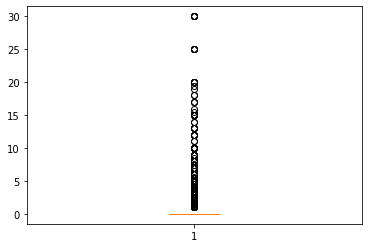

In [36]:
plt.boxplot(df['Price'])
plt.show()

## b. Reviews column
**i. Make suitable plot**

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

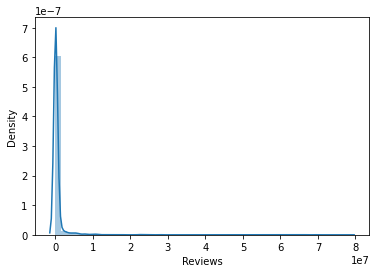

In [37]:
sns.distplot(df['Reviews'])


**ii. Limit data to apps with < 1 Million reviews**

In [38]:
data1=df[df['Reviews'] <1000000]

In [39]:
data1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.00000,10000,0,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.00000,500000,0,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.00000,5000000,0,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.00000,50000000,0,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.00000,100000,0,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.00000,500,0,0.0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.00000,5000,0,0.0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.00000,100,0,0.0,Everyone,Education,6-Jul-18,1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.52952,1000,0,0.0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


## c. Installs
**i. What is the 95th percentile of the installs?**

In [40]:
percentile = df.Installs.quantile(0.95)

In [41]:
print(percentile)

100000000.0


*100000000.0 percentile,"is 95th percentile of Installs*

**ii. Drop records having a value more than the 95th percentile**

In [42]:
temp1 = df[df["Installs"] > percentile].index
df.drop(labels = temp1, inplace = True)

In [43]:
print(temp1.value_counts().sum())

130


# **Data analysis to answer business questions**
## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
**a. How do you explain this?**

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


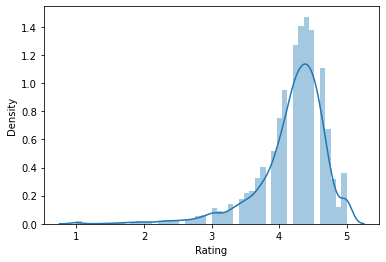

The skewness of this distribution is -1.8425872652320243
The Median of this distribution 4.3 is greater than mean 4.190117289313644 of this distribution


In [44]:
sns.distplot(df['Rating'])
plt.show()
print('The skewness of this distribution is',df['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(df.Rating.median(),df.Rating.mean()));


**b. What is the implication of this on your analysis?**

In [45]:
df['Rating'].mode()

0    4.4
dtype: float64

***Since mode>= median > mean, the distribution of Rating is Negatively Skewed.Therefore distribution of Rating is more Skewed towards lower values.***

# 6. What are the top Content Rating values?

**a. Are there any values with very few records?**

In [46]:
df['Content Rating'].value_counts()

Everyone           7303
Teen               1055
Mature 17+          458
Everyone 10+        388
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

**b. If yes, drop those as they won’t help in the analysis**

In [47]:
df.drop(df[df['Content Rating']=="Unrated"].index , inplace=True)
df.drop(df[df['Content Rating']=="Adults only 18+"].index,inplace=True)

In [48]:
df.groupby('Content Rating').count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Everyone,7303,7303,7303,7303,7303,7303,7303,7303,7303,7303,7303,7303
Everyone 10+,388,388,388,388,388,388,388,388,388,388,388,388
Mature 17+,458,458,458,458,458,458,458,458,458,458,458,458
Teen,1055,1055,1055,1055,1055,1055,1055,1055,1055,1055,1055,1055


# 7. Effect of size on rating
**a. Make a joinplot to understand the effect of size on rating**

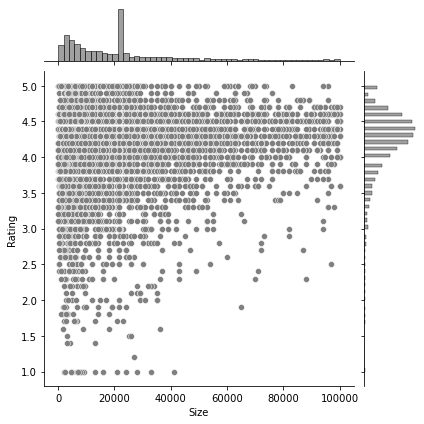

In [49]:
sns.jointplot(x ='Size', y='Rating', data = df , color ='gray')
plt.show()


**b. Do you see any patterns?**

*Yes,their is correlation between Size and Rating.*

**c. How do you explain the pattern?**

***If Rating is increasing, size of app also increasing. But every time not happen means Rating is high there size was constan. that is a positive correlation between Size and Rating***

# 8. Effect of price on rating
**a. Make a jointplot (with regression line)**


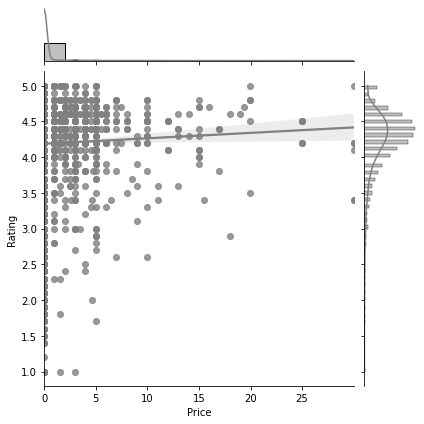

In [50]:
sns.jointplot(x='Price', y='Rating', data=df, kind='reg', color='gray')
plt.show()

**b. What pattern do you see?**

*Price is increasing , Rating almost same greater than 4*

**c. How do you explain the pattern?**

*Price is increasing , Rating almost same greater than 4 Thus it can be concluded that their is very weak Positive correlation between Rating and Price.* 

In [51]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.104691,0.077155,0.126633,0.024729
Reviews,0.104691,1.000000,0.205680,0.630588,-0.035359
Size,0.077155,0.205680,1.000000,0.187529,-0.010095
Installs,0.126633,0.630588,0.187529,1.000000,-0.065985
Price,0.024729,-0.035359,-0.010095,-0.065985,1.000000


**d. Replot the data, this time with only records with price > 0**

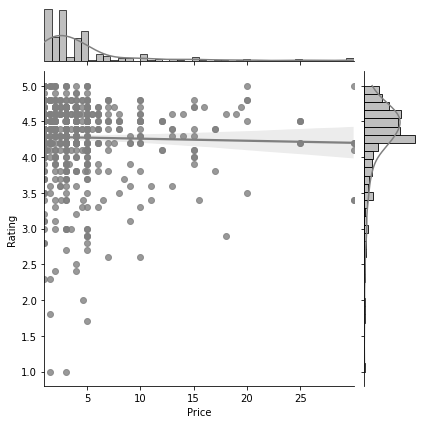

In [52]:
df1=df.loc[df.Price>0]
sns.jointplot(x='Price', y='Rating', data=df1, kind='reg', color = 'gray')
plt.show()

**e. Does the pattern change?**

In [53]:
df1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.042618,0.117950,0.058047,-0.025271
Reviews,0.042618,1.000000,0.035417,0.867270,0.018494
Size,0.117950,0.035417,1.000000,0.075466,0.024951
Installs,0.058047,0.867270,0.075466,1.000000,-0.012865
Price,-0.025271,0.018494,0.024951,-0.012865,1.000000


*Yes, The pattern change.**

**f. What is your overall inference on the effect of price on the rating**

*Generally Prices increasing , doesn't have effect on Rating. For Higher Price, Rating is High and almost constant ie greater than 4*

# 9. Look at all the numeric interactions together –
**a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'**

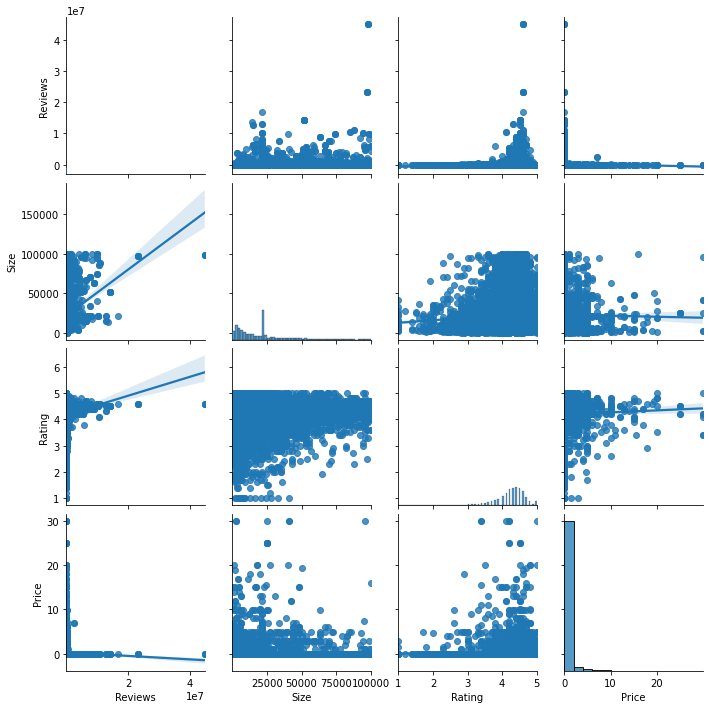

In [54]:
sns.pairplot(df, vars=[ 'Reviews', 'Size', 'Rating', 'Price'],kind = 'reg')
plt.show()

# Task 10. Rating vs. content rating
**a. Make a bar plot displaying the rating for each content rating**

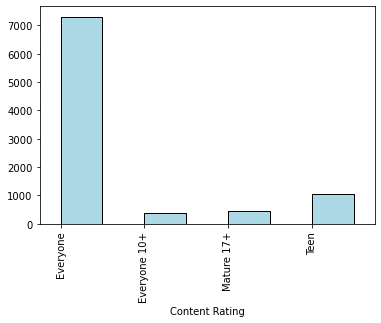

In [55]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color = "lightblue", align = "edge", edgecolor= "k", linewidth=1)
plt.show()

**b. Which metric would you use? Mean? Median? Some other quantile?**

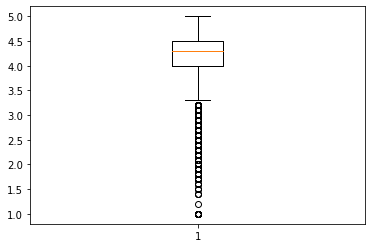

In [56]:
plt.boxplot(df['Rating'])
plt.show()

*We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.*

**c. Choose the right metric and plot**

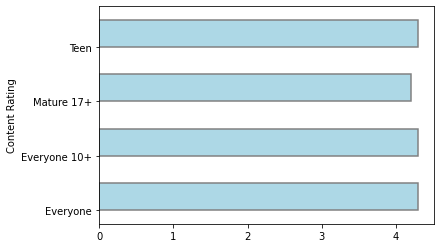

In [57]:
df.groupby(['Content Rating'])['Rating'].median().plot.barh(color="lightblue",align = "edge", edgecolor= "gray", linewidth=1.5)
plt.show()

# Task 11. Content rating vs. size vs. rating – 3 variables at a time
**a. Create 5 buckets (20% records in each) based on Size**

In [58]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.149206,4.247561,4.015183,4.190289
20k-40k,4.226398,4.194413,4.193370,4.237500
40k-60k,4.192857,4.265957,4.202222,4.270896
60k-80k,4.272052,4.356818,4.190909,4.291045
80k-100k,4.280000,4.405556,4.252632,4.314815


**b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination**

In [59]:
temp3=pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.8,4.02,3.5,3.9
20k-40k,4.0,4.00,4.0,4.0
40k-60k,3.9,4.10,4.1,4.0
60k-80k,4.0,4.20,4.0,4.0
80k-100k,4.1,4.30,4.0,4.1


# c. Make a heatmap of this
**i. Annotated**

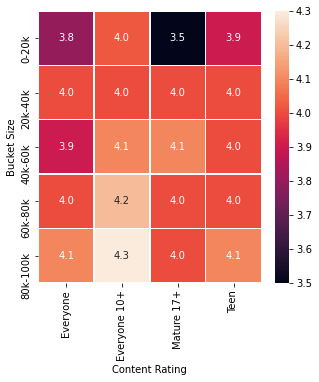

In [65]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

**ii.Greens color map**

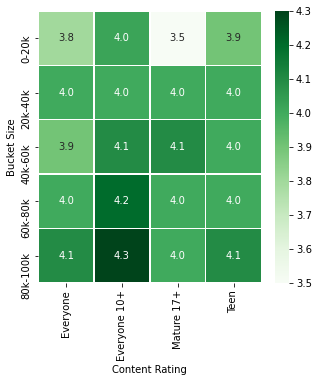

In [66]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

**d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?**

**Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. So, in general we can conclude that heavier apps are preferred in all categories.**